In [563]:
!pip install torch  --upgrade

Requirement already up-to-date: torch in /opt/conda/lib/python3.6/site-packages (0.4.0)
tensorflow 1.4.1 requires enum34>=1.1.6, which is not installed.
tensorflow 1.4.1 has requirement tensorflow-tensorboard<0.5.0,>=0.4.0rc1, but you'll have tensorflow-tensorboard 1.5.1 which is incompatible.


In [1]:
import torch
print("#GPU-", torch.cuda.device_count())

#GPU- 2


In [2]:
from torch.utils.data import Dataset, DataLoader
ip_s = 50000
op_s = 500
bat_s = 100
data_s = 1000
class randDataset(Dataset):
    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)
    def __getitem__(self, index):
        return self.data[index]
    def __len__(self):
        return self.len
rand_loader = DataLoader(randDataset(ip_s, data_s), bat_s, shuffle=True)
rand_loader

In [4]:
import torch.nn as nn
class FCN(nn.Module):
    def __init__(self, ip_s, op_s):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(ip_s, int((ip_s+op_s)/2))
        self.fc2 = nn.Linear(int((ip_s+op_s)/2), op_s)
    def forward(self, input):
        output = self.fc1(input)
        output = self.fc2(output)
        print("\tFCN: input", input.size(),"output", output.size())
        return output
two_layer_nn = FCN(ip_s, op_s).cuda()
two_layer_nn = nn.DataParallel(two_layer_nn)
for data in rand_loader:
    input = data
    output = two_layer_nn(input)
    print("input", input.size(),"output", output.size())

/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py:24: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 0 which
    has less than 75% of the memory or cores of GPU 1. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


	FCN: input	FCN: input torch.Size([50, 50000]) output torch.Size([50, 500])
 torch.Size([50, 50000]) output torch.Size([50, 500])
input torch.Size([100, 50000]) output torch.Size([100, 500])
	FCN: input	FCN: input torch.Size([50, 50000]) output torch.Size([50, 500])
 torch.Size([50, 50000]) output torch.Size([50, 500])
input torch.Size([100, 50000]) output torch.Size([100, 500])
	FCN: input 	FCN: inputtorch.Size([50, 50000]) torch.Size([50, 50000]) output torch.Size([50, 500])
 output torch.Size([50, 500])
input torch.Size([100, 50000]) output torch.Size([100, 500])
	FCN: input	FCN: input torch.Size([50, 50000]) output torch.Size([50, 500])
 torch.Size([50, 50000]) output torch.Size([50, 500])
input torch.Size([100, 50000]) output torch.Size([100, 500])
	FCN: input	FCN: input torch.Size([50, 50000]) torch.Size([50, 50000]) output torch.Size([50, 500])
 output torch.Size([50, 500])
input torch.Size([100, 50000]) output torch.Size([100, 500])
	FCN: input	FCN: input  torch.Size([50, 50000

In [564]:
!pip install problog

    100% |████████████████████████████████| 1.1MB 5.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for problog ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/a8/71/e2/0870fd5958fd64dde4a143b97dedefe91d9fd0796845457c2e
Successfully built problog
tensorflow 1.4.1 requires enum34>=1.1.6, which is not installed.
tensorflow 1.4.1 has requirement tensorflow-tensorboard<0.5.0,>=0.4.0rc1, but you'll have tensorflow-tensorboard 1.5.1 which is incompatible.


In [572]:
!pip install pyro-ppl

    100% |████████████████████████████████| 102kB 2.2MB/s a 0:00:01
    100% |████████████████████████████████| 1.6MB 6.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyro-ppl ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/25/50/79/a888f0784f0409b6296e4b5aa82795a63a4cf61d6864f9f095
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/44/c0/34/6f98693a554301bdb405f8d65d95bbcd3e50180cbfdd98a94e
Successfully built pyro-ppl networkx
  Found existing installation: networkx 1.11
    Uninstalling networkx-1.11:
      Successfully uninstalled networkx-1.11


In [569]:
!pip install tensorflow --upgrade

    100% |████████████████████████████████| 49.1MB 705kB/s eta 0:00:01  4% |█▍                              | 2.1MB 9.8MB/s eta 0:00:05    11% |███▊                            | 5.6MB 11.5MB/s eta 0:00:04    16% |█████▏                          | 8.0MB 10.3MB/s eta 0:00:04    18% |██████                          | 9.2MB 11.2MB/s eta 0:00:04    32% |██████████▍                     | 16.0MB 11.6MB/s eta 0:00:03    70% |██████████████████████▋         | 34.7MB 18.9MB/s eta 0:00:01    78% |█████████████████████████       | 38.3MB 14.1MB/s eta 0:00:01    90% |████████████████████████████▉   | 44.2MB 16.5MB/s eta 0:00:01
    100% |████████████████████████████████| 8.8MB 3.4MB/s eta 0:00:01    30% |█████████▊                      | 2.7MB 19.4MB/s eta 0:00:01
Requirement not upgraded as not directly required: wheel>=0.26 in /opt/conda/lib/python3.6/site-packages (from tensorflow) (0.30.0)
Requirement not upgraded as not directly required: six>=1.10.0 in /opt/conda/lib/python3.6/site-packages (

In [7]:
import torch.nn as nn
class FCN(nn.Module):
    def __init__(self,n,o):
        super().__init__()
        self.fc1=nn.Linear(n,int(n/2))
        self.fc2=nn.Linear(int(n/2),o)
    def forward(self,x):
        x=self.fc1(x)
        x=self.fc2(x)
        return x  

In [579]:
from torch.utils.data import DataLoader
n=64
o=1
bs=int(n/8)
ip=(torch.randn(n).cuda())
#print("ip",ip)
rand_loader = DataLoader(ip,batch_size=bs, shuffle=False)
for data in rand_loader:
    two_layer_nn=nn.DataParallel(FCN(data.size()[0],o).cuda())
    op=two_layer_nn(data)
    print("batch",two_layer_nn)    

AssertionError: Tensors not supported in scatter.

In [10]:
n=64
o=4
torch.manual_seed(n)
ip = (torch.randn(n)).cuda()
two_layer_nn=nn.DataParallel(FCN(n,o).cuda())
#two_layer_nn=FCN(n,o).cuda()
op=two_layer_nn(ip)
op

/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py:24: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 0 which
    has less than 75% of the memory or cores of GPU 1. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


RuntimeError: size mismatch, m1: [1 x 32], m2: [64 x 32] at /pytorch/aten/src/THC/generic/THCTensorMathBlas.cu:249

In [11]:
import torch.nn
rng=1
input1 = torch.rand(64*rng, 3*rng, 128*rng, 128*rng).cuda()
input2 = torch.Tensor(64*rng, 3*rng, 128*rng, 128*rng).uniform_(-1, 1).cuda()
input1 = torch.autograd.Variable(input1, requires_grad=True)
input2 = torch.autograd.Variable(input2, requires_grad=True)
#expected = torch.mul(input1, input2)
expected = input1 - input2
expected.mean()

tensor(0.4994, device='cuda:0')

In [12]:
# imports
import torch # do not run this line after instantiating TorchClient
import torch.nn as nn
from torch.autograd import Variable
from grid.clients.torch import TorchClient
import numpy as np
import re

# instantiate client!
client = TorchClient(verbose=False)

ModuleNotFoundError: No module named 'grid'

In [340]:
!pip install gym

    100% |████████████████████████████████| 1.5MB 5.8MB/s ta 0:00:01
    100% |████████████████████████████████| 1.0MB 7.2MB/s ta 0:00:011    24% |███████▊                        | 245kB 7.6MB/s eta 0:00:01
  Running setup.py bdist_wheel for gym ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/cb/14/71/f4ab006b1e6ff75c2b54985c2f98d0644fffe9c1dddc670925
Successfully built gym
tensorflow 1.4.1 requires enum34>=1.1.6, which is not installed.
tensorflow 1.4.1 has requirement tensorflow-tensorboard<0.5.0,>=0.4.0rc1, but you'll have tensorflow-tensorboard 1.5.1 which is incompatible.


In [343]:
import  gym
env  =  gym.make()
for i_episode in xrange(20):
    observation = env.reset()
    for t in xrange(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

TypeError: make() missing 1 required positional argument: 'id'

In [349]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima price dataset
dataset = datasets.load_boston()
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

TypeError: unhashable type: 'slice'

# filetered dataset via https://github.com/animesh/CheXNet fork

In [130]:
from glob import glob
imgs = glob(os.path.join('./CheXNet/ChestX-ray14/images/', "*.png"))
imgs[2]

'./CheXNet/ChestX-ray14/images/00009232_001.png'

In [138]:
#pip install --upgrade pip
!pip install opencv-python

    100% |████████████████████████████████| 24.9MB 944kB/s eta 0:00:01 21.3MB/s eta 0:00:0119MB 13.2MB/s eta 0:00:01    74% |████████████████████████        | 18.6MB 28.1MB/s eta 0:00:01    96% |███████████████████████████████ | 24.1MB 14.1MB/s eta 0:00:01
tensorflow 1.4.1 requires enum34>=1.1.6, which is not installed.
tensorflow 1.4.1 has requirement tensorflow-tensorboard<0.5.0,>=0.4.0rc1, but you'll have tensorflow-tensorboard 1.5.1 which is incompatible.


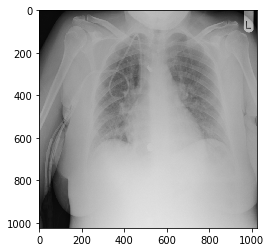

In [174]:
import cv2
import matplotlib.pylab as plt
cvimg = cv2.imread(imgs[2],1)
plt.imshow(cvimg)

In [141]:
%time Xrays256 = np.array([cv2.resize(cv2.imread(img,0), (256, 256), interpolation = cv2.INTER_AREA)/255 for img in imgs[:]])

CPU times: user 3min 17s, sys: 21.7 s, total: 3min 39s
Wall time: 29min 25s


In [142]:
Xrays256.shape

(10000, 256, 256)

In [178]:
import pandas as pd
validation = pd.read_table("./CheXNet/ChestX-ray14/labels/val_list.txt.sel", sep=' ',header=None)#,index_col=0)
train = pd.read_table("./CheXNet/ChestX-ray14/labels/train_list.txt.sel", sep=' ',index_col=0,header=None)
test = pd.read_table("./CheXNet/ChestX-ray14/labels/test_list.txt.sel", sep=' ',index_col=0,header=None)
validation, train, test

(                   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
 0    00008473_000.png   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 1    00008473_001.png   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 2    00008473_002.png   0   0   0   0   0   0   0   0   0   0   1   0   0   0
 3    00008473_003.png   0   0   0   0   0   0   0   0   0   0   1   0   0   0
 4    00008473_004.png   0   0   0   0   0   0   0   1   0   0   0   0   0   0
 5    00008473_005.png   0   0   1   0   0   0   0   1   0   0   0   0   0   0
 6    00008473_006.png   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 7    00008473_007.png   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 8    00008473_008.png   0   0   0   0   0   0   0   0   0   0   0   0   1   0
 9    00008473_009.png   0   0   0   1   0   0   0   0   0   0   0   0   0   0
 10   00008473_010.png   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 11   00008473_011.png   0   0   0   1   0   0   0  

In [179]:
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax',
                  'Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration',
                  'Fibrosis','Pneumonia', 'No Finding']
len(pathology_list)

15

In [180]:
sample_labels=validation.append([train, test],ignore_index=True)
(sample_labels)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,00008473_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00008473_001.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,00008473_002.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,00008473_003.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,00008473_004.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,00008473_005.png,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6,00008473_006.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,00008473_007.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,00008473_008.png,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,00008473_009.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [181]:
sample_labels.columns=pathology_list
sample_labels


,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,No Finding
0,00008473_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00008473_001.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,00008473_002.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,00008473_003.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,00008473_004.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,00008473_005.png,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6,00008473_006.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,00008473_007.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,00008473_008.png,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,00008473_009.png,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [185]:
binary_labels = sample_labels.iloc[:,-1].values.reshape(-1,1)
multiclass_labels = sample_labels.iloc[:,-15:].values

binary_labels.shape, multiclass_labels.shape

((10000, 1), (10000, 15))

In [186]:
binary_labels = 1-binary_labels
binary_labels

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [195]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xrays256, binary_labels, test_size = .2)

In [198]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=71, shuffle=True, random_state=42)
batches = [train for test, train  in kf.split(X_train, y_train)]
batches[0].shape

(113,)

In [199]:
kf = KFold(n_splits=18, shuffle=True, random_state=42)
test_batches = [t_batch for _, t_batch  in kf.split(X_test, y_test)]
test_batches[0]

array([  29,   56,   65,   69,   70,   99,  111,  124,  128,  210,  212,
        239,  247,  251,  254,  256,  275,  281,  297,  324,  353,  361,
        368,  374,  383,  429,  450,  478,  507,  544,  572,  584,  585,
        611,  620,  628,  651,  674,  678,  746,  755,  771,  787,  792,
        824,  857,  879,  889,  905,  907,  909,  916,  938,  944,  964,
        987,  993, 1054, 1078, 1080, 1083, 1089, 1118, 1179, 1182, 1233,
       1244, 1273, 1289, 1290, 1292, 1323, 1333, 1370, 1395, 1419, 1450,
       1453, 1473, 1474, 1483, 1487, 1502, 1512, 1532, 1555, 1556, 1568,
       1608, 1609, 1621, 1623, 1646, 1647, 1664, 1691, 1696, 1729, 1731,
       1741, 1798, 1819, 1833, 1847, 1852, 1860, 1884, 1922, 1927, 1931,
       1981, 1987])

In [200]:
X_train.shape

(8000, 256, 256)

In [252]:
#graph
import tensorflow as tf
tf.reset_default_graph()
X = tf.placeholder(dtype = tf.float32,
                   shape = (None, 256, 256), #remember i resized image to 128x128 grayscale using .reshape(-1,128,128,1)
                   name = 'X')

y = tf.placeholder(dtype = tf.float32,
                   shape = (None),
                   name = 'y')

# Input Layer
input_layer = tf.reshape(X, [-1, 128, 128, 1])
                                                                        
# Convolutional Layer #1
out = tf.layers.conv2d(inputs=input_layer,filters=4,
                         kernel_size=[2, 2],
                         padding="same",
                         activation=tf.nn.relu)
# Pooling Layer #1
out = tf.layers.max_pooling2d(inputs=out,
                                pool_size=[2, 2],##64 x 64, strides = 2 so our image is compressed from 128 --> 64
                                    strides=2)
# 2nd Convolutional Layer #2 and Pooling Layer #2
out = tf.layers.conv2d(inputs=out,filters=8,
                         kernel_size=[2, 2],
                         padding="same",
                         activation=tf.nn.relu)
# 2nd Pooling Layer    
out = tf.layers.max_pooling2d(inputs=out,
                                pool_size=[2, 2],#64x64 14 -- >7
                                strides=2)
# 3rd Convolutional Layer
out = tf.layers.conv2d(inputs=out,filters=8,
                         kernel_size=[2, 2],
                         padding="same",
                         activation=tf.nn.relu)
# Dense, dropout, dense Layer
out = tf.reshape(out, [-1, 64 * 64 * 8]) #FLATTEN LAYER
dense = tf.layers.dense(inputs=out, units=100, activation=tf.nn.relu) #FIRST DENSE LAYER
dropout = tf.layers.dropout(inputs=dense,
                            rate=0.2)#40% to zero DROPOUT LAYER
dense2 = tf.layers.dense(inputs=dropout, units=100, activation=tf.nn.relu) #SECOND DENSE LAYER

# Logits Layer
y_hat = tf.layers.dense(inputs=dense2, units=1, #will need to change this once I have more labels/diseases
                        activation = tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)#gives the loss 

optimizer = tf.train.AdamOptimizer(0.001)

training_op = optimizer.minimize(loss)#optimizes the loss fx with adam gradient descent

saver = tf.train.Saver()

In [394]:
%%time
#execution phase

init = tf.global_variables_initializer()

test_err = []
train_err = []
pred = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(35): #maybe add some minibatches so it converges faster
        for count, batch in enumerate(batches):
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op,
                     feed_dict={X:X_batch, y:y_batch})
            print('epoch:{0}, batch{1}'.format(epoch, count), end='\r')
            
        train_loss = sess.run(loss, feed_dict={X:X_batch, y:y_batch})
        train_err.append(train_loss)
#         test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        
#         test_err.append(test_loss)
       
        print('epoch', epoch, train_loss) #no need for the 'epoch+1', just epoch will suffice
        
    saver.save(sess,'./128Xrays.ckpt')
    
    for batch in test_batches:
        pred.append(sess.run(y_hat, feed_dict={X:X_test[batch]}))

epoch 0 0.14391147
epoch 1 0.14391147
epoch 2 0.14391147
epoch 3 0.14391147
epoch 4 0.14391147
epoch 5 0.14391147
epoch 6 0.14391147
epoch 7 0.14391147
epoch 8 0.14391147
epoch 9 0.14391147
epoch 10 0.14391147
epoch 11 0.14391147
epoch 12 0.14391147
epoch 13 0.14391147
epoch 14 0.14391147
epoch 15 0.14391147
epoch 16 0.14391147
epoch 17 0.14391147
epoch 18 0.14391147
epoch 19 0.14391147
epoch 20 0.14391147
epoch 21 0.14391147
epoch 22 0.14391147
epoch 23 0.14391147
epoch 24 0.14391147
epoch 25 0.14391147
epoch 26 0.14391147
epoch 27 0.14391147
epoch 28 0.14391147
epoch 29 0.14391147
epoch 30 0.14391147
epoch 31 0.14391147
epoch 32 0.14391147
epoch 33 0.14391147
epoch 34 0.14391147
CPU times: user 1min 51s, sys: 3min 5s, total: 4min 57s
Wall time: 4min 20s


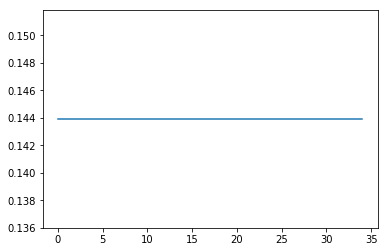

In [205]:
plt.plot(train_err)

In [207]:
predictions = [result for p in pred for result in p ]
predictions

[array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], d

In [212]:
from  sklearn.metrics import accuracy_score,log_loss #ytrue ypred
log_loss(y_test, [[p[0],1-p[0]] for p in predictions])

34.43516006572594

In [213]:
np.round([p[0] for p in predictions])

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [215]:
# Compute confusion matrix
confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])
cnf_matrix = confusion_matrix(y_test, np.round([p[0] for p in predictions]))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Findings', 'Abnormal Findings'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Findings', 'Abnormal Findings'],
                      normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: name 'confusion_matrix' is not defined

In [68]:
z = np.array([[1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]])
z.shape

(3, 4)

In [94]:
z=z.reshape(-1,3,2)
z

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])

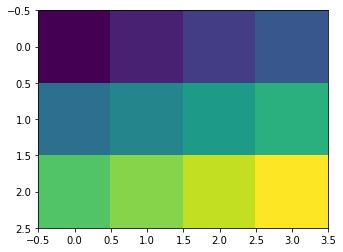

In [77]:
import matplotlib.pylab as plt
z=z.reshape(3,-1)
plt.imshow(z)

In [219]:
X=Variable(torch.Tensor(Xrays256[:,1,1].reshape(-1,1))).cuda()
y=Variable(torch.Tensor(Xrays256[:,1,2].reshape(-1,1))).cuda()
X, y

(Variable containing:
  0.1373
  0.2314
  0.0431
    ⋮    
  0.1922
  0.7765
  0.8118
 [torch.cuda.FloatTensor of size 10000x1 (GPU 0)], Variable containing:
  0.1020
  0.1961
  0.0431
    ⋮    
  0.1608
  0.7490
  0.7961
 [torch.cuda.FloatTensor of size 10000x1 (GPU 0)])

In [230]:
w=Variable(torch.Tensor(Xrays256[:,1,3].reshape(-1,1)), requires_grad=True).cuda()

In [242]:
y=X@(w.transpose(0,1))

In [243]:
y#.backward()

Variable containing:
 0.0113  0.0258  0.0059  ...   0.0205  0.1007  0.1071
 0.0191  0.0436  0.0100  ...   0.0345  0.1697  0.1806
 0.0036  0.0081  0.0019  ...   0.0064  0.0316  0.0337
          ...             ⋱             ...          
 0.0158  0.0362  0.0083  ...   0.0286  0.1409  0.1500
 0.0639  0.1462  0.0335  ...   0.1157  0.5694  0.6060
 0.0669  0.1528  0.0350  ...   0.1210  0.5953  0.6335
[torch.cuda.FloatTensor of size 10000x10000 (GPU 0)]

In [244]:
w.grad.data.zero_()

AttributeError: 'NoneType' object has no attribute 'data'

In [246]:
!conda install pyro

Fetching package metadata ...An unexpected error has occurred.
Please consider posting the following information to the
conda GitHub issue tracker at:

    https://github.com/conda/conda/issues



Current conda install:

               platform : linux-64
          conda version : 4.3.34
       conda is private : False
      conda-env version : 4.3.34
    conda-build version : not installed
         python version : 3.6.4.final.0
       requests version : 2.18.4
       root environment : /opt/conda  (writable)
    default environment : /opt/conda
       envs directories : /opt/conda/envs
                          /home/jovyan/.conda/envs
          package cache : /opt/conda/pkgs
                          /home/jovyan/.conda/pkgs
           channel URLs : https://conda.anaconda.org/conda-forge/linux-64
                          https://conda.anaconda.org/conda-forge/noarch
                          https://repo.continuum.io/pkgs/main/linux-64
                          https://repo.conti

In [250]:
import pyro
from pyro.distributions import Bernoulli, Normal  # noqa: F401
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

ModuleNotFoundError: No module named 'pyro'

In [220]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__() 
        self.linear = nn.Linear(input_dim, output_dim,bias=True).cuda()
    def forward(self, x):
        out = self.linear(x)
        return out

In [221]:
input_dim = 1
output_dim = 1
l_rate = 0.01
model = LinearRegressionModel(input_dim,output_dim)
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

In [223]:
epochs = 100
for epoch in range(epochs):
    epoch +=1
    optimiser.zero_grad()
    outputs = model.forward(X)
    loss = criterion(outputs, y)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

epoch 1, loss 0.01758129894733429
epoch 2, loss 0.01697053574025631
epoch 3, loss 0.01638472080230713
epoch 4, loss 0.015822838991880417
epoch 5, loss 0.015283907763659954
epoch 6, loss 0.014766992069780827
epoch 7, loss 0.014271188527345657
epoch 8, loss 0.013795639388263226
epoch 9, loss 0.013339509256184101
epoch 10, loss 0.012902011163532734
epoch 11, loss 0.012482378631830215
epoch 12, loss 0.012079882435500622
epoch 13, loss 0.011693825013935566
epoch 14, loss 0.011323531158268452
epoch 15, loss 0.01096835732460022
epoch 16, loss 0.010627685114741325
epoch 17, loss 0.010300924070179462
epoch 18, loss 0.009987503290176392
epoch 19, loss 0.009686878882348537
epoch 20, loss 0.009398524649441242
epoch 21, loss 0.009121940471231937
epoch 22, loss 0.008856646716594696
epoch 23, loss 0.008602181449532509
epoch 24, loss 0.008358102291822433
epoch 25, loss 0.00812398362904787
epoch 26, loss 0.007899417541921139
epoch 27, loss 0.007684016600251198
epoch 28, loss 0.007477403152734041
epoch 

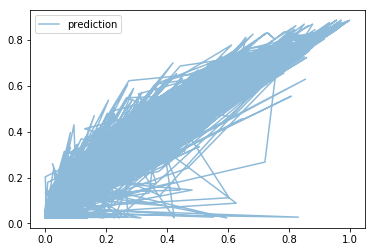

OrderedDict([('linear.weight', 
 0.8614
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]
), ('linear.bias', 
1.00000e-02 *
  2.4016
[torch.cuda.FloatTensor of size 1 (GPU 0)]
)])


In [224]:
predicted =model.forward(X).cpu().data.numpy()
#plt.plot(X, y, 'i', label = 'from data', alpha = .5)
plt.plot(y.cpu().data.numpy(), predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())